# Understanding Descriptive Statistics

Import the necessary libraries here:

In [86]:
# Libraries

import pandas as pd
import random
import os
import matplotlib.pyplot as plt
import numpy as np


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [87]:
# your code here

def dice_throw(n):
    throws = random.choices([1,2,3,4,5,6], k=n)
    return pd.DataFrame(throws)

dice=dice_throw(10)
dice

,0
0,3
1,6
2,5
3,5
4,5
5,2
6,1
7,3
8,1
9,5


In [88]:
dice.sum()

0    36
dtype: int64

#### 2.- Plot the results sorted by value.

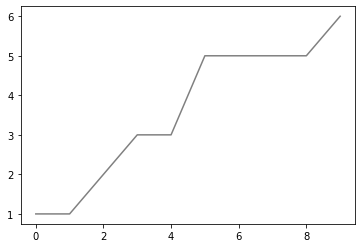

In [89]:
# your code here

dice=dice.sort_values(by=0).reset_index()[0]

plt.plot(dice, color = "gray")

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([2., 1., 2., 0., 4., 1.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

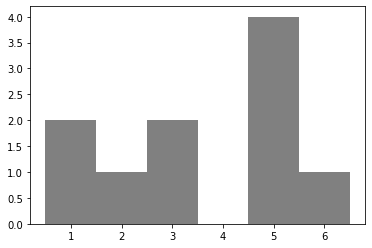

In [90]:
# your code here

plt.hist(dice, bins=6, range=(0.5,6.5), color="gray")

In [91]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [92]:
# your code here

def mean(dice):
    average = dice.sum()/len(dice)
    return(average)

mean(dice)

3.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [93]:
# your code here

def frequency(vals):
    freq_dist = {}
    for x in vals:
        if x in freq_dist:
            freq_dist[x] += 1
        else:
            freq_dist[x] = 1
    return freq_dist sum ([k*v for k,v in freq_dist.items() / sum(v for k,v in freq_dist.items())])

SyntaxError: invalid syntax (<ipython-input-93-b6fe07265d3c>, line 10)

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [94]:
dice.median()

4.0

In [98]:
# your code here

list_.sort()

def median(list_):
    if len(list_) % 2 != 0: # if odd (impar), return one in the middle 
        return len(int(list_))/2
    else: # if even (par), return the average of the 2 positions in the middle
        return sum(list_[int(len(list_)/2)-1:int(len(list_)/2)+1])/2

median (dice)

4.0

In [99]:
dice

0    1
1    1
2    2
3    3
4    3
5    5
6    5
7    5
8    5
9    6
Name: 0, dtype: int64

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [100]:
# your code here

def quartiles(dice):
    
    srtd = sorted(dice)
    
    half_list = int(len(srtd)/2)
    
    Q2 = median(dice)
    
    Q3 = median(srtd[half_list:])
    
    Q1 = median(srtd[:half_list])
    
    print("Q1: " + str(Q1))
    
    print("Q3: " + str(Q3))
    
    print("Q2: " + str(Q2))
    
    print("Interquartile Range: " + str(Q3 - Q1))
    
quartiles(dice)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [ ]:
# your code here

os.getcwd()
dice_100 = pd.read_csv("/Users/jonpradabenito/Ironhack/3.Labs/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv")
dice_100 = dice_100["value"].sort_values().reset_index()
dice_100

In [ ]:
plt.plot(dice_100["value"])

In [ ]:
"""
The higher the thorw, the higher the value of the dice"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [ ]:
# your code here

dice_100.mean()

#### 3.- Now, calculate the frequency distribution.


In [ ]:
dice_100

In [ ]:
# your code here

dice_100.shape # 100 rowns

dice_100 = dice_100.value_counts().reset_index().sort_values('index').reset_index(drop=True)
#dice_100.columns = ['Throw', 'Frequency']
dice_100


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [ ]:
# your code here

plt.hist(dice_100, bins=6, color= 'gray')

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [ ]:
# your code here

df = pd.read_csv("/Users/jonpradabenito/Ironhack/3.Labs/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv")
df

In [ ]:
"""
your comments here
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [ ]:
# your code here

df_original = pd.read_csv("/Users/jonpradabenito/Ironhack/3.Labs/lab-understanding-descriptive-stats/data/ages_population.csv")
df_original.shape # 1000 osbervations

df = df_original.value_counts() # lenght now is 72. Values are already grouped.
df = df.reset_index() # generate a new DataFrame with the index reset
df.columns = ['Age', 'Frequency'] # changing column names
df = df.sort_values('Age').reset_index() # order the observations by age and add another index column
df

In [ ]:
df.plot("Age","Frequency")

# by looking at the plot, the median should be around 40 and 
#the standard deviation (68% of the points - 680 obs - are in the range median + - STD), so 30 - 50

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
# your code here

print ("The mean is: ", df_original.mean())

print ("The standard devisation is: ", df_original.std())

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [ ]:
# your code here

df_original2 = pd.read_csv("/Users/jonpradabenito/Ironhack/3.Labs/lab-understanding-descriptive-stats/data/ages_population2.csv")
df_original2.shape # 1000 osbervations

df2 = df_original2.value_counts().reset_index()
df2.columns = ['Age', 'Frequency']
df2 = df2.sort_values('Age').reset_index()
df2

In [ ]:
df2.plot("Age","Frequency")

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
While the number of observations is the same, the population in 2 is younger. 
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here

print ("The mean in population 2 is: ", df_original2.mean())

print ("The standard devisation in population 2 is: ", df_original2.std())

In [ ]:
"""
Mean close to median
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here

df_original3 = pd.read_csv("/Users/jonpradabenito/Ironhack/3.Labs/lab-understanding-descriptive-stats/data/ages_population3.csv")
df_original3.shape # 1000 osbervations

df3 = df_original3.value_counts().reset_index()
df3.columns = ['Age', 'Frequency']
df3 = df3.sort_values('Age').reset_index()
df3

In [ ]:
df3.plot("Age","Frequency")

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

print ("The mean in population 3 is: ", df_original3.mean())

print ("The standard devisation in population 3 is: ", df_original3.std())


In [ ]:
"""
The mean is not close to the median"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

df3.quantile([0.25,0.5,0.75])


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

df3.quantile([0.10,0.40,0.60])


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""